<div style="text-align:center">
    <img src="https://upload.wikimedia.org/wikipedia/commons/b/b0/Logo_Universidad_Polit%C3%A9cnica_Salesiana_del_Ecuador.png" alt="UPS">
    <h1>Practica Procesamiento Paralelo</h1>
    <h2>Nombre: Leonardo Crespo, Carlos Saico</h2>
</div>


# 1. Modulos e Importaciones

In [ ]:
!pip install es_core_news_sm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import copy
import string
import re
from multiprocessing import Pool, cpu_count
import time
print("Módulos y clases importados")

Módulos y clases importados


In [ ]:

import nltk
# Descargar los recursos necesarios de NLTK
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
import spacy

# Cargar el modelo de lenguaje en español de spaCy
nlp = spacy.load('es_core_news_sm')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
stopwords_es = stopwords.words('spanish')
lemmatizer = WordNetLemmatizer()
PUNCT_TO_REMOVE = string.punctuation

# Descripción del Conjunto de Datos

## Nombre del Conjunto de Datos
Tweets en Español Sobre Vacunas

## Fuente
El conjunto de datos se ha obtenido de la plataforma Kaggle, que es una comunidad en línea de científicos de datos y aprendices de máquina que permite a los usuarios encontrar y publicar conjuntos de datos, explorar y construir modelos.

## Descripción
Este conjunto de datos contiene tweets en español relacionados con las vacunas. Los detalles específicos sobre las características del conjunto de datos, como el número de tweets, las columnas disponibles y la información que contienen, se pueden encontrar en la página del conjunto de datos en [Kaggle](https://www.kaggle.com/datasets/juancruzarancibia/tweets-en-espaol-sobre-vacunas).
### Datos
Este dataset se conforma de 463365 datos con 18 columnas de variables

## Uso
Este conjunto de datos puede ser útil para realizar análisis de sentimientos, procesamiento del lenguaje natural, análisis de texto y otras tareas relacionadas con el aprendizaje automático y la ciencia de datos.


In [ ]:
dfOriginal = pd.read_csv('/content/drive/MyDrive/paralelo/vacunasXFrase.csv', sep = '|',low_memory=False)

dataframe=copy.deepcopy(dfOriginal)
print(dataframe.shape)
dataframe.head(5)

(463365, 18)


,Unnamed: 0,_id,id,conversation_id,date,time,username,name,place,tweet,replies_count,retweets_count,likes_count,hashtags,link,retweet,near,geo
0,0,{'$oid': '608d625607aff31cdc6edec3'},1388098691664318464,1388098691664318464,2021-04-30,08:51:32,zaidapedrozo,Zaida Pedrozo,NaN,Que informe @FernanQuirosBA cuándo van a dar l...,0,0,0,[],https://twitter.com/ZaidaPedrozo/status/138809...,False,NaN,NaN
1,1,{'$oid': '608d625607aff31cdc6edec4'},1388097770922389504,1388095512398675968,2021-04-30,08:47:52,robermasotta,Roberto Masotta,NaN,@Monique_C123 El mismo Lanata que dijo que la ...,0,0,0,[],https://twitter.com/robermasotta/status/138809...,False,NaN,NaN
2,2,{'$oid': '608d625607aff31cdc6edec5'},1388096978152824832,1388056731398328320,2021-04-30,08:44:43,noe_1011,"Usa tu mascarilla, yo uso la mia",NaN,@gorka_orive @CronicaVasca Buenos días! No tie...,0,0,0,[],https://twitter.com/Noe_1011/status/1388096978...,False,NaN,NaN
3,3,{'$oid': '608d625607aff31cdc6edec6'},1388096078860402688,1387957865445576704,2021-04-30,08:41:09,paulayadarola,ceciliay,NaN,@alferdez Ojala que esas vacunas sirvan para c...,0,0,0,[],https://twitter.com/paulayadarola/status/13880...,False,NaN,NaN
4,4,{'$oid': '608d625607aff31cdc6edec7'},1388094704919760896,1387917386549022720,2021-04-30,08:35:41,taverandres,AndresM TaveraM,NaN,@rabodeajip @Melquisedec70 @RonnySuarez_ La su...,0,0,0,[],https://twitter.com/TaverAndres/status/1388094...,False,NaN,NaN


# Eliminación de variables innecesarias

In [ ]:

dataframe=dataframe.drop(['_id'], axis=1)
dataframe=dataframe.drop(['place'], axis=1)
dataframe=dataframe.drop(['replies_count'], axis=1)
dataframe=dataframe.drop(['retweets_count'], axis=1)
dataframe=dataframe.drop(['likes_count'], axis=1)
dataframe=dataframe.drop(['hashtags'], axis=1)
dataframe=dataframe.drop(['link'], axis=1)
dataframe=dataframe.drop(['near'], axis=1)
dataframe=dataframe.drop(['geo'], axis=1)

print(dataframe.shape)
dataframe.head(10)

(463365, 9)


,Unnamed: 0,id,conversation_id,date,time,username,name,tweet,retweet
0,0,1388098691664318464,1388098691664318464,2021-04-30,08:51:32,zaidapedrozo,Zaida Pedrozo,Que informe @FernanQuirosBA cuándo van a dar l...,False
1,1,1388097770922389504,1388095512398675968,2021-04-30,08:47:52,robermasotta,Roberto Masotta,@Monique_C123 El mismo Lanata que dijo que la ...,False
2,2,1388096978152824832,1388056731398328320,2021-04-30,08:44:43,noe_1011,"Usa tu mascarilla, yo uso la mia",@gorka_orive @CronicaVasca Buenos días! No tie...,False
3,3,1388096078860402688,1387957865445576704,2021-04-30,08:41:09,paulayadarola,ceciliay,@alferdez Ojala que esas vacunas sirvan para c...,False
4,4,1388094704919760896,1387917386549022720,2021-04-30,08:35:41,taverandres,AndresM TaveraM,@rabodeajip @Melquisedec70 @RonnySuarez_ La su...,False
5,5,1388086142235549696,1388086142235549696,2021-04-30,08:01:40,alekohner,Alejandro Kohner,"A un amigo le dieron la vacuna china, le pego ...",False
6,6,1388085050776883200,1388085050776883200,2021-04-30,07:57:20,culemanias,Culemanía,¿Por qué Messi se pondrá la vacuna china contr...,False
7,7,1388084216785690624,1387030630790311936,2021-04-30,07:54:01,jmnh74,Rompe el lapiz,@alterxlia @Lat648 Srta la vacuna China no ha ...,False
8,8,1388081632893079552,1387915563364724736,2021-04-30,07:43:45,mariade11345520,Mariadelmar,@faapura Señor ministro y acá cuando nos dan l...,False
9,9,1388081576538525696,1387905384682299392,2021-04-30,07:43:31,mgabriela48,GG,"@SantiCafiero Santiaguito, te recuerdo q con l...",False


# Transformación de los datos de la variable tweet de Mayusculas a Minusculas

In [ ]:
dataframe["tweet"] = dataframe["tweet"].str.lower()
dataframe.head()

,Unnamed: 0,id,conversation_id,date,time,username,name,tweet,retweet
0,0,1388098691664318464,1388098691664318464,2021-04-30,08:51:32,zaidapedrozo,Zaida Pedrozo,que informe @fernanquirosba cuándo van a dar l...,False
1,1,1388097770922389504,1388095512398675968,2021-04-30,08:47:52,robermasotta,Roberto Masotta,@monique_c123 el mismo lanata que dijo que la ...,False
2,2,1388096978152824832,1388056731398328320,2021-04-30,08:44:43,noe_1011,"Usa tu mascarilla, yo uso la mia",@gorka_orive @cronicavasca buenos días! no tie...,False
3,3,1388096078860402688,1387957865445576704,2021-04-30,08:41:09,paulayadarola,ceciliay,@alferdez ojala que esas vacunas sirvan para c...,False
4,4,1388094704919760896,1387917386549022720,2021-04-30,08:35:41,taverandres,AndresM TaveraM,@rabodeajip @melquisedec70 @ronnysuarez_ la su...,False


# Procesamiento y Limpieza de Texto en Tweets

Este código realiza varias tareas de procesamiento y limpieza de texto en un conjunto de datos de tweets. Las funciones implementadas realizan las siguientes tareas:

1. **Tokenización**: Divide el texto en palabras individuales o "tokens".
2. **Remoción de Puntuación**: Elimina los signos de puntuación del texto.
3. **Limpieza del Texto**: Realiza varias tareas de limpieza, incluyendo la eliminación de URLs, emojis, números y palabras vacías.
4. **Lematización**: Transforma cada palabra a su forma base o "lema".
5. **Procesamiento de Bloques**: Aplica todas las funciones anteriores a un bloque del DataFrame.

El resultado es un texto limpio y procesado que está listo para ser utilizado en análisis posteriores.


In [ ]:
from nltk.tokenize import word_tokenize
# Función para remover puntuación
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))
# Función para tokenizar el texto
def tokenize_text(text):
    return word_tokenize(text)

# Función para limpiar el texto

def clean_text(tokens):
    text = " ".join(tokens)
    # Eliminar URLs
    text = re.sub(r'http\S+|www.\S+', '', text, flags=re.MULTILINE)
    # Eliminar emojis (opción mejorada que no elimina tildes)
    text = re.sub(r'[^\w\s,]', '', text, flags=re.UNICODE)
    # Eliminar números
    text = re.sub(r'\d+', '', text)
    # Eliminar puntuación
    text = remove_punctuation(text)
    words = text.split()
    # Filtrar palabras vacías
    filtered_words = [word for word in words if word.lower() not in stopwords_es]
    return ' '.join(filtered_words)

def lemmatize_text(text):
    doc = nlp(text)
    lemmatized_words = [token.lemma_ for token in doc]
    return ' '.join(lemmatized_words)
# Función para procesar un bloque del DataFrame
def process_block(block):
    print("Procesando..............")
    block['tweet_tokenized'] = block['tweet'].apply(tokenize_text)
    print("Texto tokenizado")
    block['tweet_cleaned'] = block['tweet_tokenized'].apply(clean_text)
    print("Texto limpio")
    block['tweet_lemmatized'] = block['tweet_cleaned'].apply(lemmatize_text)
    print("Texto lematizado")
    return block


# Procesamiento Paralelo de Texto en Tweets

Este código realiza el procesamiento y la limpieza de texto en un conjunto de datos de tweets de manera paralela. Las tareas implementadas son las siguientes:

1. **División del DataFrame**: Divide el DataFrame en bloques iguales al número de núcleos de la CPU.
2. **Procesamiento Paralelo**: Utiliza la biblioteca `multiprocessing` para procesar los bloques de datos en paralelo. Cada bloque se procesa utilizando la función `process_block` definida anteriormente.
3. **Tiempo de Ejecución**: Calcula el tiempo de inicio y finalización del procesamiento paralelo para medir el rendimiento.
4. **Concatenación de Resultados**: Une todos los bloques procesados en un solo DataFrame.

El resultado es un DataFrame con el texto de los tweets limpio y procesado, listo para ser utilizado en análisis posteriores. Los primeros 10 registros del DataFrame resultante se muestran al final.


In [ ]:
# Dividir el DataFrame en bloques y procesar en paralelo
num_blocks = cpu_count()
blocks = [dataframe.iloc[i::num_blocks] for i in range(num_blocks)]
start_time_parallel = time.time()
with Pool(num_blocks) as pool:
    result_blocks = pool.map(process_block, blocks)
end_time_parallel = time.time()
result_df = pd.concat(result_blocks)

result_df.head(10)

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Procesando..............
Procesando..............
Procesando..............
Procesando..............
Procesando..............
Procesando..............
Procesando..............
Procesando..............
Texto tokenizado
Texto tokenizado
Texto tokenizado
Texto tokenizado
Texto tokenizado
Texto tokenizado
Texto tokenizado
Texto tokenizado
Texto limpio
Texto limpio
Texto limpioTexto limpio

Texto limpio
Texto limpioTexto limpio

Texto limpio
Texto lematizado
Texto lematizado
Texto lematizado
Texto lematizado
Texto lematizado
Texto lematizado
Texto lematizado
Texto lematizado


,Unnamed: 0,id,conversation_id,date,time,username,name,tweet,retweet,tweet_tokenized,tweet_cleaned,tweet_lemmatized
0,0,1388098691664318464,1388098691664318464,2021-04-30,08:51:32,zaidapedrozo,Zaida Pedrozo,que informe @fernanquirosba cuándo van a dar l...,False,"[que, informe, @, fernanquirosba, cuándo, van,...",informe fernanquirosba cuándo van dar segunda ...,informir fernanquirosba cuándo ir dar segundo ...
8,8,1388081632893079552,1387915563364724736,2021-04-30,07:43:45,mariade11345520,Mariadelmar,@faapura señor ministro y acá cuando nos dan l...,False,"[@, faapura, señor, ministro, y, acá, cuando, ...",faapura señor ministro acá dan segunda dosis v...,faapura señor ministro acá dar segundo dosis v...
16,16,1388054375466258432,1388039628989550592,2021-04-30,05:55:26,josesr2708,joseSR,"@f_sanchez_drago antígenos no, anticuerpos. y ...",False,"[@, f_sanchez_drago, antígenos, no, ,, anticue...",fsanchezdrago antígenos anticuerpos deberías h...,fsanchezdraguir antígenos anticuerpo debería h...
24,24,1388012688245198848,1387948706087981056,2021-04-30,03:09:47,arias1690,Steban Arias,@betos1190 @crash2040 @madricr algún problema ...,False,"[@, betos1190, @, crash2040, @, madricr, algún...",betos crash madricr algún problema vacuna chin...,beto crash madricr alguno problema vacuno chin...
32,32,1387986092595494912,1387774287302610944,2021-04-30,01:24:06,richard73633252,Richard Arteaga,@giovanniarce no hay confianza en la vacuna china,False,"[@, giovanniarce, no, hay, confianza, en, la, ...",giovanniarce confianza vacuna china,giovanniarcir confianza vacuno chino
40,40,1387971295590195200,1387866102550704128,2021-04-30,00:25:18,foxlegui,Foxlegui,@lanacion hey amigo. dejen de amasetear la cur...,False,"[@, lanacion, hey, amigo, ., dejen, de, amaset...",lanacion hey amigo dejen amasetear curva bajen...,lanacion hey amigo dejar amasetear curvo bajen...
48,48,1387958677206876160,1387592410482593792,2021-04-29,23:35:10,ferminsan11,sergio santana,@mrcacun @marcogarba04 @jose_moraless1 @doctor...,False,"[@, mrcacun, @, marcogarba04, @, jose_moraless...",mrcacun marcogarba josemoraless doctormacias m...,mrcacun marcogarba josemoraless doctormacia ma...
56,56,1387949914232180736,1387949914232180736,2021-04-29,23:00:21,gkitanick,Guillermo Kitanick,"seguimos con el ""pan y el circo"" con el show-r...",False,"[seguimos, con, el, ``, pan, y, el, circo, '',...",seguimos pan circo showrelato vacuna china cas...,seguir pan circo showrelato vacuna china caso ...
64,64,1387944361720168448,1387912854028836864,2021-04-29,22:38:17,josesoriagarci1,JSG_MAD78,@teestaca @noticiascaracol y la vacuna chiná q...,False,"[@, teestaca, @, noticiascaracol, y, la, vacun...",teestaca noticiascaracol vacuna chiná comprado...,teestacar noticiascaracol vacuna chiná comprad...
72,72,1387935906963890176,1387774287302610944,2021-04-29,22:04:41,sdavidg79,Saulo Gil,"@giovanniarce tranquilo, dile a tu papá que no...",False,"[@, giovanniarce, tranquilo, ,, dile, a, tu, p...",giovanniarce tranquilo dile papá pondran vacun...,giovanniarcir tranquilo dile papá pondrar vacu...


# Uso de Pool.map para Procesamiento Paralelo

La función `Pool.map` es una parte integral de la biblioteca `multiprocessing` en Python. Esta función permite la ejecución paralela de una función sobre diferentes entradas distribuyendo las entradas entre diferentes procesos.

## ¿Por qué se utiliza Pool.map?

1. **Eficiencia**: Al distribuir el trabajo entre múltiples procesos, `Pool.map` puede aprovechar al máximo los múltiples núcleos de la CPU. Esto es especialmente útil para tareas que son intensivas en CPU, como el procesamiento de texto en tu código.

2. **Facilidad de uso**: `Pool.map` es muy fácil de usar. Solo necesitas proporcionar la función que deseas ejecutar en paralelo y las entradas para esa función. `Pool.map` se encarga de la distribución del trabajo y la recopilación de los resultados.

En tu código, `Pool.map` se utiliza para aplicar la función `process_block` a cada bloque de datos en tu DataFrame. Como cada bloque se puede procesar de forma independiente, esta es una excelente oportunidad para el procesamiento paralelo. Al hacerlo, puedes acelerar significativamente el tiempo total de procesamiento.


# Guardado del Dataset limpio

In [ ]:
# Guarda el DataFrame en un archivo CSV
result_df.to_csv('processed_tweets.csv', index=False)

# Tiempo de ejecucion en paralelo

In [ ]:
# Tiempo de procesamiento paralelo
parallel_duration = end_time_parallel - start_time_parallel
print(f"Tiempo de procesamiento paralelo: {parallel_duration:.2f} segundos")

Tiempo de procesamiento paralelo: 805.49 segundos


# Procesamiento en Secuencial y Tiempo de ejecución

In [ ]:
# Procesamiento secuencial
start_time_sequential = time.time()

dataframe['tweet_cleaned'] = dataframe['tweet'].apply(clean_text)
dataframe['tweet_lemmatized'] = dataframe['tweet_cleaned'].apply(lemmatize_text)
end_time_sequential = time.time()

# Tiempo de procesamiento secuencial
sequential_duration = end_time_sequential - start_time_sequential
print(f"Tiempo de procesamiento secuencial: {sequential_duration:.2f} segundos")


Tiempo de procesamiento secuencial: 7312.34 segundos


# Resultados

In [ ]:
print(f"Tiempo de procesamiento secuencial: {sequential_duration:.2f} segundos")
print(f"Tiempo de procesamiento paralelo: {parallel_duration:.2f} segundos")
print(f"Diferencia de tiempo: {sequential_duration - parallel_duration:.2f} segundos")
print(f"Velocidad relativa: {sequential_duration / parallel_duration:.2f}x más rápido en paralelo")


Tiempo de procesamiento secuencial: 7312.34 segundos
Tiempo de procesamiento paralelo: 805.49 segundos
Diferencia de tiempo: 6506.85 segundos
Velocidad relativa: 9.08x más rápido en paralelo


1. Tiempo de procesamiento secuencial: El tiempo que tomó procesar los datos de forma secuencial fue de 7312.34 segundos. Esto significa que cada tarea se realizó una tras otra.

2. Tiempo de procesamiento paralelo: Al dividir las tareas entre múltiples procesos, el tiempo de procesamiento se redujo a 805.49 segundos. Esto es significativamente más rápido que el procesamiento secuencial.

3. Diferencia de tiempo: La diferencia de tiempo entre el procesamiento secuencial y paralelo fue de 6506.85 segundos. Esto muestra cuánto tiempo se ahorró al utilizar el procesamiento paralelo.

4. Velocidad relativa: El procesamiento paralelo fue 9.08 veces más rápido que el proceso secuencial. Esto significa que por cada segundo que pasaba en el procesamiento secuencial, el procesamiento paralelo podría haber realizado la misma tarea 9.08 veces.

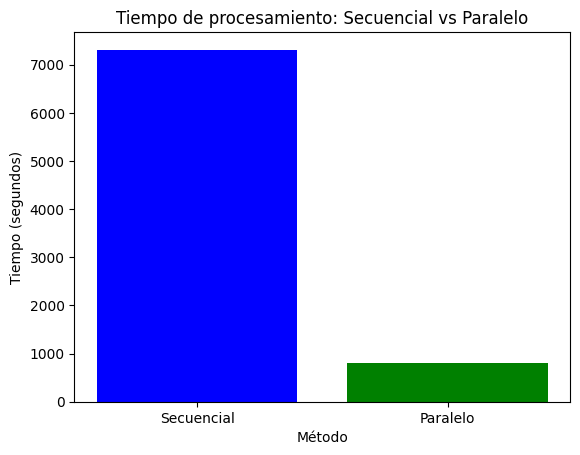

In [ ]:
import matplotlib.pyplot as plt

# Datos para graficar
labels = ['Secuencial', 'Paralelo']
times = [sequential_duration, parallel_duration]

# Crear gráfico de barras
plt.bar(labels, times, color=['blue', 'green'])

# Agregar título y etiquetas de los ejes
plt.title('Tiempo de procesamiento: Secuencial vs Paralelo')
plt.xlabel('Método')
plt.ylabel('Tiempo (segundos)')

# Mostrar el gráfico
plt.show()


# Análisis de Tweets acorde al Día(Madrugada, Mañana. Tarde y Noche)

In [ ]:
# Función para analizar tweets por tiempo del día
def filter_by_time_of_day(df, start_hour, end_hour):
    df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S')
    return df[(df['time'].dt.hour >= start_hour) & (df['time'].dt.hour < end_hour)]


In [ ]:
# Ejemplo de análisis por hora del día
morning_tweets = filter_by_time_of_day(result_df, 6, 12)
afternoon_tweets = filter_by_time_of_day(result_df, 12, 18)
evening_tweets = filter_by_time_of_day(result_df, 18, 24)
night_tweets = filter_by_time_of_day(result_df, 0, 6)

In [ ]:
print("\nTweets en la mañana:")
morning_tweets.head(10)



Tweets en la mañana:


,Unnamed: 0,id,conversation_id,date,time,username,name,tweet,retweet,tweet_tokenized,tweet_cleaned,tweet_lemmatized
0,0,1388098691664318464,1388098691664318464,2021-04-30,1900-01-01 08:51:32,zaidapedrozo,Zaida Pedrozo,que informe @fernanquirosba cuándo van a dar l...,False,"[que, informe, @, fernanquirosba, cuándo, van,...",informe fernanquirosba cuándo van dar segunda ...,informir fernanquirosba cuándo ir dar segundo ...
8,8,1388081632893079552,1387915563364724736,2021-04-30,1900-01-01 07:43:45,mariade11345520,Mariadelmar,@faapura señor ministro y acá cuando nos dan l...,False,"[@, faapura, señor, ministro, y, acá, cuando, ...",faapura señor ministro acá dan segunda dosis v...,faapura señor ministro acá dar segundo dosis v...
272,272,1387777886497742848,1387774287302610944,2021-04-29,1900-01-01 11:36:46,milenadovil,Milena,@giovanniarce @ocram ese canal desenmascaró al...,False,"[@, giovanniarce, @, ocram, ese, canal, desenm...",giovanniarce ocram canal desenmascaró canal ad...,giovanniarcir ocram canal desenmascarar canal ...
280,280,1387773367273639936,1387772090573545472,2021-04-29,1900-01-01 11:18:48,luquesbrenda,𝓑𝓻𝓮𝓷𝓭𝓪 𝓛𝓾𝓺𝓾𝓮𝓼 ✨,"@dai_colmann jajajaja, la vacuna china amiga. ...",False,"[@, dai_colmann, jajajaja, ,, la, vacuna, chin...",daicolmann jajajaja vacuna china amiga espero ...,daicolmann jajajaja vacuna china amiga espero ...
288,288,1387767020905803776,1387764923426643968,2021-04-29,1900-01-01 10:53:35,pampaytita,juan pablo,@feriglesias nadie se debe querer dar esa vacu...,False,"[@, feriglesias, nadie, se, debe, querer, dar,...",feriglesias nadie debe querer dar vacuna china...,feriglesia nadie deber querer dar vacuna china...
296,296,1387763260808630272,1387752682685964288,2021-04-29,1900-01-01 10:38:39,lau_uribefig,Laura_uribe,@jgolubov pues si... como en chile con la vacu...,False,"[@, jgolubov, pues, si, ..., como, en, chile, ...",jgolubov pues si chile vacuna china,jgolubov pues si chilar vacuna china
304,304,1387754727207747584,1387754727207747584,2021-04-29,1900-01-01 10:04:44,pl_tesoro,TESORO-PrensaLatina,bangladesh aprobó uso de vacuna china sinophar...,False,"[bangladesh, aprobó, uso, de, vacuna, china, s...",bangladesh aprobó uso vacuna china sinopharm c...,bangladesh aprobar uso vacuno china sinopharm ...
312,312,1387750165071663104,1387750165071663104,2021-04-29,1900-01-01 09:46:37,lucho02231013,Lucho,con la vacuna china de la gripe empezo todo ma...,False,"[con, la, vacuna, china, de, la, gripe, empezo...",vacuna china gripe empezo mataron ancianos ita...,vacuno chino gripe empezo matar anciano italia...
320,320,1387739630343270400,1387739630343270400,2021-04-29,1900-01-01 09:04:45,juanramaldonado,JuanRa Maldonado,para los que desconfían de la vacuna china 👇👇👇,False,"[para, los, que, desconfían, de, la, vacuna, c...",desconfían vacuna china,desconfir vacuna chino
328,328,1387730839266545664,1387572209691004928,2021-04-29,1900-01-01 08:29:49,dibuchob,Cesar Dibucho B.,@adrianzeneduard cadete estas hablando de la v...,False,"[@, adrianzeneduard, cadete, estas, hablando, ...",adrianzeneduard cadete hablando vacuna china v...,adrianzeneduard cadete hablar vacuno chino vac...


In [ ]:
print("\nTweets en la tarde:")
afternoon_tweets.head(10)



Tweets en la tarde:


,Unnamed: 0,id,conversation_id,date,time,username,name,tweet,retweet,tweet_tokenized,tweet_cleaned,tweet_lemmatized
168,168,1387868745973047296,1387868745973047296,2021-04-29,1900-01-01 17:37:49,rodriescobarsv,Rodrigo Escobar🇸🇻,🎥➡️ @bbcmundo revela en un reportaje el posibl...,False,"[🎥➡️, @, bbcmundo, revela, en, un, reportaje, ...",bbcmundo revela reportaje posible precio vacun...,bbcmundo revelar reportaje posible precio vacu...
176,176,1387863323878768640,1387859167835312128,2021-04-29,1900-01-01 17:16:16,hugocastrom,hugo castro moreno,@paulinaastrozas ningún país europeo ni usa ap...,False,"[@, paulinaastrozas, ningún, país, europeo, ni...",paulinaastrozas ningún país europeo usa aprueb...,paulinaastroza ninguno país europeo usar aprue...
184,184,1387856929058394112,1387571506876755968,2021-04-29,1900-01-01 16:50:51,gabyu03,Gaby,@ernestorr y miebtras tanto en el pasi del nu...,False,"[@, ernestorr, y, miebtras, tanto, en, el, pas...",ernestorr miebtras pasi nunca jamas negociados...,ernestorr miebtras pasi nunca jama negociado v...
192,192,1387854039212339200,1387852023220121600,2021-04-29,1900-01-01 16:39:22,marinabigli,Maru Biglieri,@jotaxtv alguien le tiene confianza justamente...,False,"[@, jotaxtv, alguien, le, tiene, confianza, ju...",jotaxtv alguien confianza justamente vacuna china,jotaxtv alguien confianzar justamente vacuno c...
200,200,1387840237792112640,1387572209691004928,2021-04-29,1900-01-01 15:44:32,karlosq7,KarlosQ,@bbravomz @adrianzeneduard @willaxtv ya llega ...,False,"[@, bbravomz, @, adrianzeneduard, @, willaxtv,...",bbravomz adrianzeneduard willaxtv llega vacuna...,bbravomz adrianzeneduard willaxtv llegar vacun...
208,208,1387831273486442496,1387831273486442496,2021-04-29,1900-01-01 15:08:54,ronaldgalvez_,Ronald Gálvez,messi recibirá una vacuna china contra el covi...,False,"[messi, recibirá, una, vacuna, china, contra, ...",messi recibirá vacuna china covid tcocfspiqut,messi recibir vacuna china covid tcocfspiqut
216,216,1387822882168864768,1387822882168864768,2021-04-29,1900-01-01 14:35:34,blacked_98,blacked_98,messi y la selección argentina recibirán la va...,False,"[messi, y, la, selección, argentina, recibirán...",messi selección argentina recibirán vacuna chi...,messi selección argentino recibir vacuna chino...
224,224,1387817716157927424,1387817716157927424,2021-04-29,1900-01-01 14:15:02,marianovinuela,Mariano Viñuela,ahora sí. ya me implantaron el nanochip de la ...,False,"[ahora, sí, ., ya, me, implantaron, el, nanoch...",ahora implantaron nanochip vacuna china centro...,ahora implantar nanochip vacuna chino centro i...
232,232,1387814153180561408,1385760328898723840,2021-04-29,1900-01-01 14:00:53,nicolas69907327,Nicolas,@noeliapr_ hola noe. es en caba para la vacuna...,False,"[@, noeliapr_, hola, noe, ., es, en, caba, par...",noeliapr hola noe caba vacuna china,noeliapr hola noe car vacuna china
240,240,1387807966817042432,1387807966817042432,2021-04-29,1900-01-01 13:36:18,elwood_white,Jordi Blanco Duch,según una información de @esport3 leo messi se...,False,"[según, una, información, de, @, esport3, leo,...",según información esport leo messi pondrá vacu...,según información esport leo messi poner vacun...


In [ ]:
print("\nTweets en la noche:")
evening_tweets.head(10)



Tweets en la noche:


,Unnamed: 0,id,conversation_id,date,time,username,name,tweet,retweet,tweet_tokenized,tweet_cleaned,tweet_lemmatized
48,48,1387958677206876160,1387592410482593792,2021-04-29,1900-01-01 23:35:10,ferminsan11,sergio santana,@mrcacun @marcogarba04 @jose_moraless1 @doctor...,False,"[@, mrcacun, @, marcogarba04, @, jose_moraless...",mrcacun marcogarba josemoraless doctormacias m...,mrcacun marcogarba josemoraless doctormacia ma...
56,56,1387949914232180736,1387949914232180736,2021-04-29,1900-01-01 23:00:21,gkitanick,Guillermo Kitanick,"seguimos con el ""pan y el circo"" con el show-r...",False,"[seguimos, con, el, ``, pan, y, el, circo, '',...",seguimos pan circo showrelato vacuna china cas...,seguir pan circo showrelato vacuna china caso ...
64,64,1387944361720168448,1387912854028836864,2021-04-29,1900-01-01 22:38:17,josesoriagarci1,JSG_MAD78,@teestaca @noticiascaracol y la vacuna chiná q...,False,"[@, teestaca, @, noticiascaracol, y, la, vacun...",teestaca noticiascaracol vacuna chiná comprado...,teestacar noticiascaracol vacuna chiná comprad...
72,72,1387935906963890176,1387774287302610944,2021-04-29,1900-01-01 22:04:41,sdavidg79,Saulo Gil,"@giovanniarce tranquilo, dile a tu papá que no...",False,"[@, giovanniarce, tranquilo, ,, dile, a, tu, p...",giovanniarce tranquilo dile papá pondran vacun...,giovanniarcir tranquilo dile papá pondrar vacu...
80,80,1387930851543977984,1387863348352536576,2021-04-29,1900-01-01 21:44:36,aesquer79,Alejandro Esquer,"@laurogarza @drchavezdiaz que loco, al menos c...",False,"[@, laurogarza, @, drchavezdiaz, que, loco, ,,...",laurogarza drchavezdiaz loco menos cerca ta pa...,laurogarza drchavezdiaz loco menos cerca ta pa...
88,88,1387922510474272768,1387922510474272768,2021-04-29,1900-01-01 21:11:27,iamfedu,Fedu,el 06/05 vacunan con la 2da dosis a mi vieja. ...,False,"[el, 06/05, vacunan, con, la, 2da, dosis, a, m...",vacunan da dosis vieja dosis recibió casi sema...,vacunar da dosis viejo dosis recibir casi sema...
96,96,1387913637923328000,1387906873710583808,2021-04-29,1900-01-01 20:36:12,desdeinframundo,cande1972,@carlavizzotti son delirantes! es una inmorali...,False,"[@, carlavizzotti, son, delirantes, !, es, una...",carlavizzotti delirantes inmoralidad traten en...,carlavizzotti delirante inmoralidad tratir eng...
104,104,1387907379682021376,1387885849308766208,2021-04-29,1900-01-01 20:11:20,lilaoliva,Lila Oliva https://lilaolivaesculturas.blogspot.c,@fernanquirosba quisiera saber si a los que no...,False,"[@, fernanquirosba, quisiera, saber, si, a, lo...",fernanquirosba quisiera saber si vacunamos va ...,fernanquirosba querer saber si vacunar ir hace...
112,112,1387904100713521152,1387741435508711424,2021-04-29,1900-01-01 19:58:18,carisiru,Cari *,"@patinto2015 abuelo, aplaudis a chile y urugua...",False,"[@, patinto2015, abuelo, ,, aplaudis, a, chile...",patinto abuelo aplaudis chile uruguay vacuna e...,patinto abuelo aplaudis chile uruguay vacuna e...
120,120,1387901320712138752,1387901320712138752,2021-04-29,1900-01-01 19:47:15,augustodilinger,Gary Oldman sudaca,y resulta que el millón de la vacuna china de ...,False,"[y, resulta, que, el, millón, de, la, vacuna, ...",resulta millón vacuna china hoy segunda dosis ...,resultar millón vacuna chino hoy segundo dosis...


In [ ]:
print("\nTweets en la madrugada:")
night_tweets.head(10)


Tweets en la madrugada:


,Unnamed: 0,id,conversation_id,date,time,username,name,tweet,retweet,tweet_tokenized,tweet_cleaned,tweet_lemmatized
16,16,1388054375466258432,1388039628989550592,2021-04-30,1900-01-01 05:55:26,josesr2708,joseSR,"@f_sanchez_drago antígenos no, anticuerpos. y ...",False,"[@, f_sanchez_drago, antígenos, no, ,, anticue...",fsanchezdrago antígenos anticuerpos deberías h...,fsanchezdraguir antígenos anticuerpo debería h...
24,24,1388012688245198848,1387948706087981056,2021-04-30,1900-01-01 03:09:47,arias1690,Steban Arias,@betos1190 @crash2040 @madricr algún problema ...,False,"[@, betos1190, @, crash2040, @, madricr, algún...",betos crash madricr algún problema vacuna chin...,beto crash madricr alguno problema vacuno chin...
32,32,1387986092595494912,1387774287302610944,2021-04-30,1900-01-01 01:24:06,richard73633252,Richard Arteaga,@giovanniarce no hay confianza en la vacuna china,False,"[@, giovanniarce, no, hay, confianza, en, la, ...",giovanniarce confianza vacuna china,giovanniarcir confianza vacuno chino
40,40,1387971295590195200,1387866102550704128,2021-04-30,1900-01-01 00:25:18,foxlegui,Foxlegui,@lanacion hey amigo. dejen de amasetear la cur...,False,"[@, lanacion, hey, amigo, ., dejen, de, amaset...",lanacion hey amigo dejen amasetear curva bajen...,lanacion hey amigo dejar amasetear curvo bajen...
336,336,1387676462711508992,1387676462711508992,2021-04-29,1900-01-01 04:53:45,plmaden,Maden PL,anuncian en #brasil🇧🇷 producción en sao paulo ...,False,"[anuncian, en, #, brasil🇧🇷, producción, en, sa...",anuncian brasil producción sao paulo vacuna ch...,anunciar brasil producción sao paulo vacuna ch...
344,344,1387636430420185088,1387610525488631808,2021-04-29,1900-01-01 02:14:40,k3nj8i,kenji,@rppnoticias quedo se ponga la vacuna china .,False,"[@, rppnoticias, quedo, se, ponga, la, vacuna,...",rppnoticias quedo ponga vacuna china,rppnoticia quedo poner vacuna china
352,352,1387620375572353024,1387591379975553024,2021-04-29,1900-01-01 01:10:52,gerardlos,Send A Car Inc.🇨🇦🇺🇾,@gladysro2021 @alemartsot65 vos sos de tucuman...,False,"[@, gladysro2021, @, alemartsot65, vos, sos, d...",gladysro alemartsot vos sos tucuman vacuna lla...,gladysro alemartsot vo so tucumar vacuna llama...
360,360,1387613616535482368,1387585018969698304,2021-04-29,1900-01-01 00:44:01,rmal7,ALexis 7,@fsagasti @karinanovoal sería bueno que los qu...,False,"[@, fsagasti, @, karinanovoal, sería, bueno, q...",fsagasti karinanovoal bueno recibimos vacuna c...,fsagasti karinanovoal bueno recibir vacuna chi...
368,368,1387605136344764416,1387605136344764416,2021-04-29,1900-01-01 00:10:19,futnoticiasok,FutNoticias,📌 histórico: llegaron las vacunas a la conmebo...,False,"[📌, histórico, :, llegaron, las, vacunas, a, l...",histórico llegaron vacunas conmebol alejandro ...,histórico llegar vacuna conmebol alejandro dom...
560,560,1387308570052644864,1387308570052644864,2021-04-28,1900-01-01 04:31:52,gerardolo2014,gerardo lopez,sebin detiene a un tiktoker por burlarse de la...,False,"[sebin, detiene, a, un, tiktoker, por, burlars...",sebin detiene tiktoker burlarse vacuna china t...,sebin detener tiktoker burlar él vacuna chino ...


# Análisis de Frecuencia de Palabras en Tweets por Parte del Día

Este código realiza un análisis de la frecuencia de palabras en los tweets basado en la parte del día en que fueron publicados. Las tareas implementadas son las siguientes:

1. **Determinación de la Parte del Día**: Define una función `get_part_of_day` que toma una hora del día y devuelve la parte correspondiente del día ('madrugada', 'mañana', 'tarde', 'noche').

2. **Conversión de la Columna 'time'**: Convierte la columna 'time' del DataFrame a un tipo datetime para facilitar el análisis.

3. **Creación de la Columna 'part_of_day'**: Crea una nueva columna 'part_of_day' en el DataFrame que indica la parte del día en que se publicó cada tweet.

4. **Conteo de Palabras por Parte del Día**: Para cada parte del día, cuenta la frecuencia de cada palabra en los tweets y almacena los resultados en un nuevo DataFrame.

El resultado es un DataFrame que muestra la frecuencia de cada palabra en los tweets para cada parte del día. Esto puede ser útil para entender cómo cambia el contenido de los tweets a lo largo del día.


In [ ]:
from collections import Counter
def get_part_of_day(hour):
    if (hour >= 0 and hour < 6):
        return 'madrugada'
    elif (hour >= 6 and hour < 12):
        return 'mañana'
    elif (hour >= 12 and hour < 18):
        return 'tarde'
    else:
        return 'noche'

# Asegúrate de que la columna 'time' sea de tipo datetime
result_df['time'] = pd.to_datetime(result_df['time'])

# Crea una nueva columna para la parte del día
result_df['part_of_day'] = result_df['time'].dt.hour.apply(get_part_of_day)

# Crea un nuevo DataFrame para almacenar los conteos de palabras
word_counts = pd.DataFrame()

# Para cada parte del día, cuenta las palabras en los tweets
for part_of_day in ['madrugada', 'mañana', 'tarde', 'noche']:
    tweets = result_df[result_df['part_of_day'] == part_of_day]['tweet_lemmatized']
    count = Counter(" ".join(tweets).split())
    word_counts[part_of_day] = pd.Series(count)

word_counts.head(10)


,madrugada,mañana,tarde,noche
fsanchezdraguir,1,NaN,3.0,NaN
antígenos,9,12.0,16.0,5.0
anticuerpo,299,928.0,1060.0,835.0
debería,22,37.0,62.0,53.0
hacer,4015,7876.0,12860.0,11323.0
tras,357,1074.0,1345.0,996.0
tres,273,617.0,854.0,704.0
dosis,3635,10017.0,14626.0,11282.0
vacuna,54946,121007.0,181956.0,152282.0
china,7046,13703.0,20681.0,18101.0


# Frecuencia de Palabras en Tweets por Parte del Día

Los resultados muestran la frecuencia de varias palabras en los tweets para cada parte del día. Aquí están algunos puntos clave:

- La palabra **'vacuna'** es la más mencionada en todas las partes del día, con la mayor frecuencia durante la **tarde** (181956 veces), seguida de la **noche** (152282 veces), la **mañana** (121007 veces) y la **madrugada** (54946 veces).

- La palabra **'china'** también se menciona con frecuencia, especialmente durante la **tarde** (20681 veces) y la **noche** (18101 veces).

- Algunas palabras, como **'fsanchezdraguir'**, se mencionan muy pocas veces o no se mencionan en todas las partes del día.

Estos resultados ayudan a entender cómo cambian las discusiones sobre las vacunas a lo largo del día.


# Conteo Paralelo de Palabras en Tweets

Este código realiza un conteo de palabras en los tweets utilizando procesamiento paralelo. Las tareas implementadas son las siguientes:

1. **Función de Conteo de Palabras**: Define una función `count_words` que toma un bloque de datos y devuelve un objeto `Counter` con la frecuencia de cada palabra en los tweets.

2. **División del DataFrame**: Divide el DataFrame en bloques iguales al número de núcleos de la CPU.

3. **Procesamiento Paralelo**: Utiliza la biblioteca `multiprocessing` para contar las palabras en cada bloque de datos en paralelo. Cada bloque se procesa utilizando la función `count_words`.

4. **Combinación de Resultados**: Suma todos los objetos `Counter` resultantes para obtener el conteo total de palabras en todos los tweets.

El resultado es un objeto `Counter` que muestra la frecuencia de cada palabra en los tweets. Esto puede ser útil para entender las palabras más comunes en los tweets.


In [ ]:
from collections import Counter
from multiprocessing import Pool, cpu_count

# Función para contar palabras en un bloque
def count_words(block):
    words = " ".join(block['tweet_lemmatized']).split()
    return Counter(words)

# Dividir el DataFrame en bloques
num_blocks = cpu_count()
blocks = [result_df.iloc[i::num_blocks] for i in range(num_blocks)]

# Procesar en paralelo
with Pool(num_blocks) as pool:
    word_counts = pool.map(count_words, blocks)

# Combinar los resultados
total_counts = sum(word_counts, Counter())

print(total_counts)


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



# Resultados

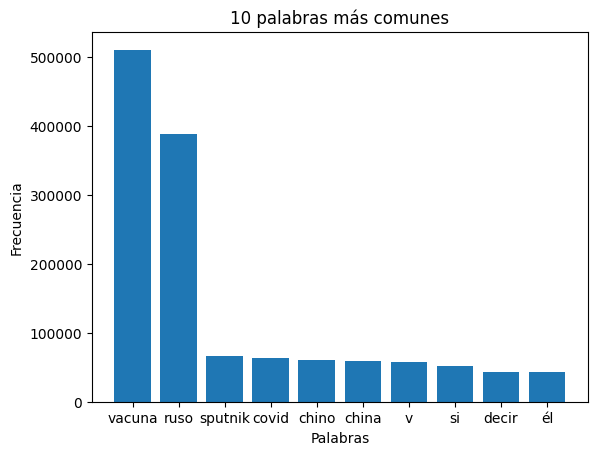

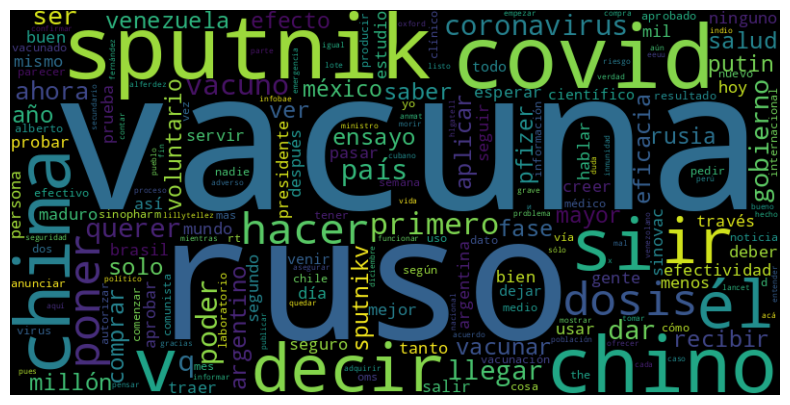

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Obtén las 10 palabras más comunes
most_common_words = total_counts.most_common(10)

# Crea un gráfico de barras de las palabras más comunes
words, counts = zip(*most_common_words)
plt.bar(words, counts)
plt.title('10 palabras más comunes')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.show()

# Crea un wordcloud de todas las palabras
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(total_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# Análisis de Tweets que Contienen las Palabras Más Comunes

Este código realiza un análisis de los tweets que contienen las 10 palabras más comunes. Las tareas implementadas son las siguientes:

1. **Búsqueda de Tweets**: Para cada una de las 10 palabras más comunes, el código busca los tweets que contienen esa palabra.

2. **Impresión de Tweets**: Imprime los primeros 5 tweets que contienen cada palabra.

Los resultados muestran los primeros 5 tweets que contienen cada una de las 10 palabras más comunes: "vacuna", "ruso", "sputnik", "covid", "chino", "china", "v", "si", "decir", "él". Este análisis puede ser útil para entender el contexto en el que se utilizan estas palabras en los tweets.


In [ ]:
# Asumiendo que 'most_common_words' es tu lista de las 10 palabras más comunes
for word, count in most_common_words:
    # Encuentra los tweets que contienen la palabra
    tweets_with_word = result_df[result_df['tweet_lemmatized'].str.contains(word)]

    # Imprime los primeros 5 tweets para cada palabra
    print(f'Primeros 5 tweets que contienen la palabra "{word}":')
    for tweet in tweets_with_word['tweet_lemmatized'].head(5):
        print(tweet)
    print('\n')


Primeros 5 tweets que contienen la palabra "vacuna":
informir fernanquirosba cuándo ir dar segundo dosis sinopharm vacuna chino mayor saber ir llegar sinopharm tiempo ministerio salud nac disponer anticipar semana dosis xa efectividad
fsanchezdraguir antígenos anticuerpo debería hacer tras tres dosis vacuna china sinopharm emirato título anticuerpo ridículo
beto crash madricr alguno problema vacuno chino mortalidad costa rica caer actual caer argumento vacuna china parecer troll aquí tcoozhdyrwfoi
lanacion hey amigo dejar amasetear curvo bajenla ahí mandamos vacuna china así cansar tcomcbxrbis
mrcacun marcogarba josemoraless doctormacia mauro viale vacunó vacuna china virus inactivado


Primeros 5 tweets que contienen la palabra "ruso":
bbravomz adrianzeneduard willaxtv llegar vacuna china ruso preocup querer ver cola nomás esperar vacuna peruano derrepente moquillo pollo efectivo
negociación panamá farmacéutico vacuna ruso sputnixv llegar este poder fijar fecha entrega mismo pasar vac

# Análisis de Bigramas en Tweets

Este código realiza un análisis de los bigramas más comunes en los tweets. Un bigrama es una secuencia de dos palabras adyacentes en un texto. Las tareas implementadas son las siguientes:

1. **Creación de Bigramas**: Crea una lista de todos los bigramas presentes en los tweets.

2. **Conteo de Bigramas**: Utiliza la clase `Counter` de la biblioteca `collections` para contar la frecuencia de cada bigrama en los tweets.

3. **Extracción de los Bigramas Más Comunes**: Extrae los 10 bigramas más comunes junto con sus frecuencias.

4. **Visualización de los Resultados**: Crea un gráfico de barras que muestra los 10 bigramas más comunes y sus frecuencias.

Los resultados muestran que los bigramas más comunes son "vacuna rusa", "sputnik v", "vacuna china", "ruso sputnik", "vacuna chino", "ruso covid", "dosis vacuna", "poner vacuna", "ruso coronavirus" y "millon dosis". El bigrama "vacuna rusa" tiene la frecuencia más alta, mientras que "millon dosis" tiene la frecuencia más baja. Este análisis puede ser útil para entender las combinaciones de palabras más comunes en los tweets.


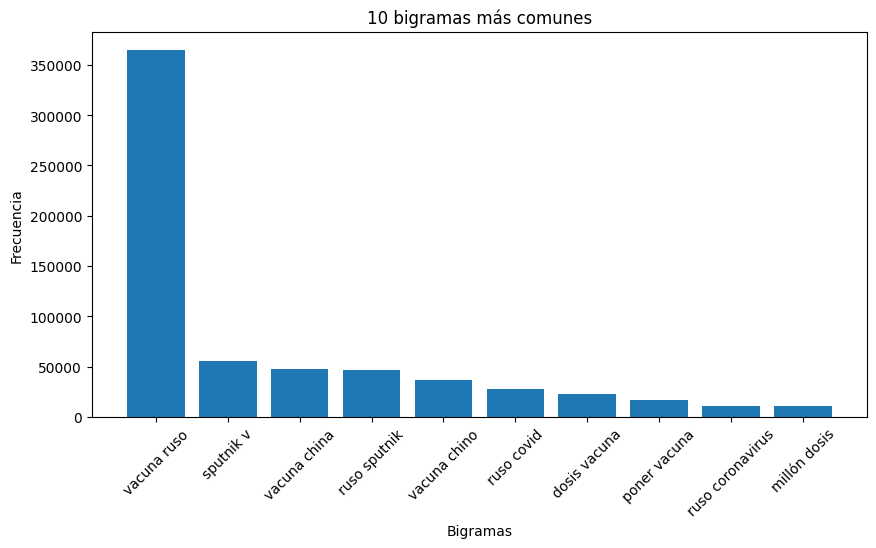

In [ ]:
import nltk
from nltk import bigrams
from collections import Counter
import matplotlib.pyplot as plt

words_in_tweet = [tweet.lower().split() for tweet in result_df['tweet_lemmatized']]

# Lista para almacenar los bigramas
bigrams = [list(bigrams(tweet)) for tweet in words_in_tweet]

# Lista plana de todos los bigramas
bigrams = [bigram for tweet in bigrams for bigram in tweet]

# Cuenta de cada bigrama en el corpus
bigram_counts = Counter(bigrams)

# Obtén los 10 bigramas más comunes
common_bigrams = bigram_counts.most_common(10)

# Extrae los bigramas y sus frecuencias
bigrams, freqs = zip(*common_bigrams)

# Crea nombres para el eje x
x_names = [f'{bigram[0]} {bigram[1]}' for bigram in bigrams]

# Crea un gráfico de barras
plt.figure(figsize=(10, 5))
plt.bar(x_names, freqs)
plt.title('10 bigramas más comunes')
plt.xlabel('Bigramas')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()



# Análisis Detallado de los Resultados

Los resultados del análisis de bigramas proporcionan una visión interesante de las combinaciones de palabras más comunes en los tweets. Aquí están algunos puntos clave:

1. **"vacuna rusa"**: Este bigrama fue el más común, lo que indica que muchos tweets estaban discutiendo sobre la vacuna rusa. Esto podría ser debido a la popularidad de la vacuna Sputnik V, que es una vacuna rusa contra el COVID-19.

2. **"sputnik v"**: Este bigrama también fue muy común, lo que refuerza la idea de que la vacuna Sputnik V fue un tema de discusión frecuente.

3. **"vacuna china"**: Este bigrama sugiere que la vacuna china también fue un tema de discusión frecuente. Esto podría estar relacionado con las vacunas Sinovac y Sinopharm, que son vacunas chinas contra el COVID-19.

4. **"ruso sputnik" y "ruso covid"**: Estos bigramas indican que muchos tweets estaban discutiendo sobre la respuesta rusa al COVID-19, específicamente en relación con la vacuna Sputnik V.

5. **"dosis vacuna"**: Este bigrama sugiere que muchos tweets estaban discutiendo sobre las dosis de la vacuna, lo que podría estar relacionado con temas como la disponibilidad de las vacunas, los horarios de las dosis y la eficacia de las vacunas después de ciertas dosis.

6. **"poner vacuna"**: Este bigrama podría estar relacionado con discusiones sobre la administración de la vacuna.

7. **"ruso coronavirus"**: Este bigrama sugiere que muchos tweets estaban discutiendo sobre la respuesta rusa al coronavirus, lo que podría incluir temas como la vacuna Sputnik V y las medidas de salud pública en Rusia.

8. **"millon dosis"**: Este bigrama podría estar relacionado con discusiones sobre la distribución de las vacunas, incluyendo la cantidad de dosis disponibles y la logística de la vacunación.

Estos resultados ayudan a entender mejor los temas de discusión más comunes en los tweets.

# Tendencias a lo largo del Tiempo 

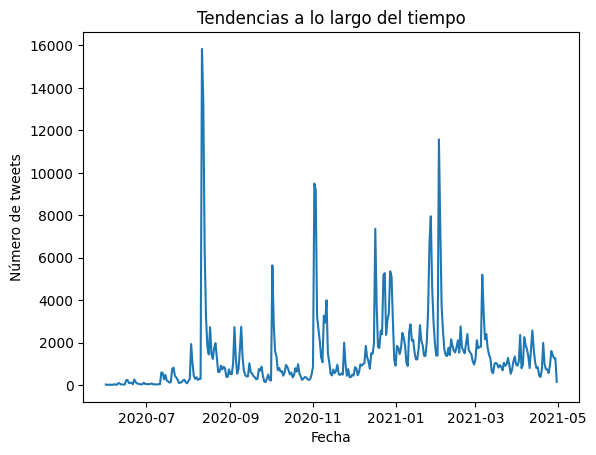

In [ ]:

result_df['date'] = pd.to_datetime(result_df['date'])

# Agrupa por fecha y cuenta el número de tweets cada día
daily_counts = result_df.groupby(result_df['date'].dt.date).size()


daily_counts.plot(kind='line')
plt.title('Tendencias a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Número de tweets')
plt.show()


# Análisis de Temas en Tweets usando el Modelo LDA

Este código realiza un análisis de temas en los tweets utilizando el modelo Latent Dirichlet Allocation (LDA). Las tareas implementadas son las siguientes:

1. **Creación de un Diccionario y un Corpus**: Crea un diccionario a partir de los tweets lematizados y luego utiliza este diccionario para crear un corpus.

2. **Entrenamiento del Modelo LDA**: Entrena un modelo LDA en el corpus. El modelo LDA es un modelo de aprendizaje automático que se utiliza para descubrir los temas latentes en un conjunto de documentos.

3. **Impresión de los Temas**: Imprime los temas descubiertos por el modelo LDA. Cada tema es una combinación de palabras con ciertas probabilidades.

Los resultados muestran los 10 temas descubiertos por el modelo LDA. Cada tema es una combinación de palabras, y las palabras más probables para cada tema incluyen términos como "vacuna", "ruso", "sputnik", "covid", "chino", "china", entre otros. 


In [ ]:
from gensim import corpora, models
from multiprocessing import cpu_count

# Crea un diccionario a partir de los tweets lematizados
dictionary = corpora.Dictionary(result_df['tweet_lemmatized'].str.split())

# Crea un corpus utilizando el diccionario
corpus = [dictionary.doc2bow(tweet) for tweet in result_df['tweet_lemmatized'].str.split()]
start_time_parallel = time.time()
# Entrena el modelo LDA con paralelización
lda_model = models.LdaMulticore(corpus, num_topics=10, id2word=dictionary, workers=cpu_count()-1)
end_time_parallel = time.time()
# Tiempo de procesamiento paralelo
parallel_duration1 = end_time_parallel - start_time_parallel
print(f"Tiempo de procesamiento paralelo: {parallel_duration1:.2f} segundos")
# Imprime los temas
for idx, topic in lda_model.print_topics(-1):
    print(f'Topic: {idx} \nWords: {topic}\n')


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Tiempo de procesamiento paralelo: 67.00 segundos
Topic: 0 
Words: 0.079*"vacuna" + 0.072*"ruso" + 0.009*"gobierno" + 0.008*"comprar" + 0.006*"aprobar" + 0.006*"anmat" + 0.006*"aprobado" + 0.005*"si" + 0.005*"oms" + 0.005*"uso"

Topic: 1 
Words: 0.086*"vacuna" + 0.071*"ruso" + 0.025*"poner" + 0.024*"ir" + 0.022*"si" + 0.014*"él" + 0.013*"decir" + 0.012*"querer" + 0.009*"chino" + 0.008*"vacunar"

Topic: 2 
Words: 0.036*"и" + 0.027*"ninguno" + 0.025*"vacuna" + 0.023*"covid" + 0.022*"ruso" + 0.020*"я" + 0.019*"posar" + 0.015*"efectoski" + 0.015*"secundarioski" + 0.013*"лопес"

Topic: 3 
Words: 0.072*"vacuna" + 0.034*"ruso" + 0.020*"chino" + 0.014*"efecto" + 0.013*"hacer" + 0.012*"china" + 0.009*"él" + 0.008*"poder" + 0.008*"secundario" + 0.007*"gobierno"

Topic: 4 
Words: 0.075*"vacuna" + 0.066*"ruso" + 0.013*"si" + 0.012*"decir" + 0.008*"poder" + 0.006*"él" + 0.005*"hacer" + 0.005*"lillytellez" + 0.005*"hlgatell" + 0.005*"estudio"

Topic: 5 
Words: 0.090*"ruso" + 0.089*"vacuna" + 0.011*"d

# Modelo Latent Dirichlet Allocation (LDA)

El modelo LDA es un modelo generativo probabilístico que se utiliza para el análisis de temas en un conjunto de documentos. Fue introducido por David Blei, Andrew Ng y Michael Jordan en 2003.

## ¿Cómo funciona el modelo LDA?

El modelo LDA asume que cada documento en un conjunto de datos es una mezcla de un número limitado de temas. Cada tema, a su vez, es una distribución de palabras. El modelo LDA intenta descubrir estos temas latentes basándose en la distribución de palabras en los documentos.

En términos más técnicos, el modelo LDA asigna a cada documento una distribución de temas (donde cada tema tiene una cierta probabilidad) y a cada tema una distribución de palabras. Estas distribuciones se estiman a partir de los datos utilizando un algoritmo de inferencia basado en la maximización de la verosimilitud.

## ¿Por qué se utilizó el modelo LDA?

El modelo LDA es una herramienta poderosa para el análisis de texto porque puede descubrir los temas latentes en un conjunto de documentos de una manera no supervisada. Esto significa que no necesitas proporcionar etiquetas de temas para los documentos de antemano.

Se utilizó el modelo LDA para descubrir los temas más comunes en un conjunto de tweets. Dado que los tweets son textos cortos y pueden abordar una variedad de temas, el modelo LDA es una excelente opción para este tipo de análisis.




In [ ]:
from gensim import corpora, models

# Crea un diccionario a partir de los tweets lematizados
dictionary = corpora.Dictionary(result_df['tweet_lemmatized'].str.split())

# Crea un corpus utilizando el diccionario
corpus = [dictionary.doc2bow(tweet) for tweet in result_df['tweet_lemmatized'].str.split()]
start_time_sequential = time.time()
# Entrena el modelo LDA
lda_model = models.LdaModel(corpus, num_topics=10, id2word=dictionary)
end_time_sequential = time.time()
# Tiempo de procesamiento secuencial
sequential_duration1 = end_time_sequential - start_time_sequential
print(f"Tiempo de procesamiento secuencial: {sequential_duration1:.2f} segundos")
# Imprime los temas
for idx, topic in lda_model.print_topics(-1):
    print(f'Topic: {idx} \nWords: {topic}\n')


Tiempo de procesamiento secuencial: 217.50 segundos
Topic: 0 
Words: 0.039*"listo" + 0.038*"sputnikv" + 0.028*"indio" + 0.026*"posar" + 0.020*"conejillo" + 0.018*"mañana" + 0.014*"amlo" + 0.012*"jajaja" + 0.010*"observar" + 0.010*"distribuir"

Topic: 1 
Words: 0.118*"vacuna" + 0.105*"ruso" + 0.027*"si" + 0.023*"poner" + 0.022*"ir" + 0.015*"decir" + 0.013*"hacer" + 0.012*"querer" + 0.009*"él" + 0.009*"chino"

Topic: 2 
Words: 0.019*"personal" + 0.017*"plan" + 0.016*"ciencia" + 0.015*"guerra" + 0.013*"entrar" + 0.011*"pronto" + 0.010*"diputado" + 0.010*"cadena" + 0.009*"gatell" + 0.009*"nación"

Topic: 3 
Words: 0.037*"ruso" + 0.032*"vacuna" + 0.026*"covid" + 0.023*"и" + 0.021*"ninguno" + 0.015*"seguridad" + 0.013*"я" + 0.010*"efectoski" + 0.010*"secundarioski" + 0.009*"poder"

Topic: 4 
Words: 0.094*"vacuna" + 0.074*"ruso" + 0.039*"covid" + 0.035*"dosis" + 0.034*"primero" + 0.024*"venezuela" + 0.022*"recibir" + 0.020*"llegar" + 0.019*"sputnik" + 0.018*"millón"

Topic: 5 
Words: 0.144*"r

# Análisis Detallado de los Resultados

Los resultados del análisis de temas proporcionan una visión interesante de los temas más comunes en los tweets. Aquí están algunos puntos clave:

1. **Temas relacionados con la vacuna**: La mayoría de los temas descubiertos por el modelo LDA están relacionados con las vacunas. Esto no es sorprendente, ya que los tweets están relacionados con las vacunas contra el COVID-19.

2. **Vacunas específicas**: Algunos temas parecen estar relacionados con vacunas específicas. Por ejemplo, los temas que contienen las palabras "ruso", "sputnik", "china" y "chino" podrían estar discutiendo sobre la vacuna Sputnik V de Rusia y las vacunas Sinovac y Sinopharm de China.

3. **Otros temas**: Algunos temas parecen estar relacionados con otros aspectos de las vacunas, como la administración de las vacunas ("poner", "dosis", "aplicar"), las opiniones y actitudes hacia las vacunas ("si", "decir", "querer"), y los efectos de las vacunas ("efecto", "secundario").



# Resultados de tiempos de procesamiento

In [ ]:
print(f"Tiempo de procesamiento secuencial: {sequential_duration1:.2f} segundos")
print(f"Tiempo de procesamiento paralelo: {parallel_duration1:.2f} segundos")
print(f"Diferencia de tiempo: {sequential_duration1 - parallel_duration1:.2f} segundos")
print(f"Velocidad relativa: {sequential_duration1 / parallel_duration1:.2f}x más rápido en paralelo")


Tiempo de procesamiento secuencial: 217.50 segundos
Tiempo de procesamiento paralelo: 67.00 segundos
Diferencia de tiempo: 150.51 segundos
Velocidad relativa: 3.25x más rápido en paralelo


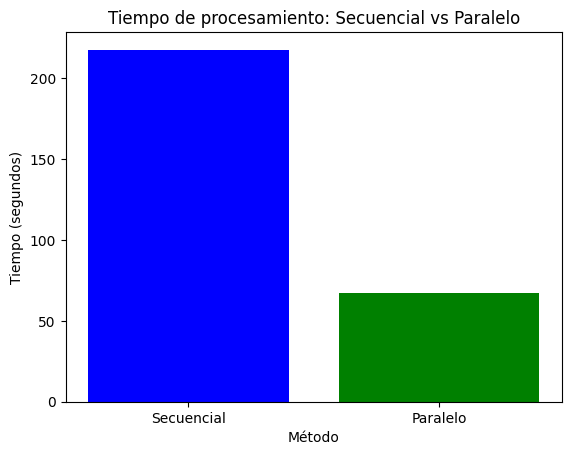

In [ ]:
import matplotlib.pyplot as plt

# Datos para graficar
labels = ['Secuencial', 'Paralelo']
times = [sequential_duration1, parallel_duration1]

# Crear gráfico de barras
plt.bar(labels, times, color=['blue', 'green'])

# Agregar título y etiquetas de los ejes
plt.title('Tiempo de procesamiento: Secuencial vs Paralelo')
plt.xlabel('Método')
plt.ylabel('Tiempo (segundos)')

# Mostrar el gráfico
plt.show()


# Conclusiones del Análisis de Tweets sobre Vacunas

1. **Frecuencia de Palabras**: Las palabras más comunes en los tweets estaban relacionadas con las vacunas y los países de origen de las vacunas, como "vacuna", "ruso", "sputnik", "covid", "chino", "china", entre otros. Esto indica que la mayoría de las discusiones en los tweets estaban centradas en las vacunas y su origen.

2. **Bigramas Más Comunes**: Los bigramas más comunes también estaban relacionados con las vacunas y su origen, como "vacuna rusa", "sputnik v", "vacuna china", entre otros. Esto refuerza la idea de que las discusiones estaban centradas en las vacunas y su origen.

3. **Análisis de Temas con LDA**: El análisis de temas con el modelo LDA reveló temas comunes en los tweets. Muchos de estos temas estaban relacionados con las vacunas, su origen, y otros aspectos de las vacunas como la administración de las vacunas y las opiniones y actitudes hacia las vacunas.

4. **Procesamiento Paralelo**: El uso del procesamiento paralelo en varias partes del análisis resultó en una mejora significativa en la eficiencia y la velocidad del análisis. Esto demuestra el poder del procesamiento paralelo para tareas de procesamiento de datos intensivas.

En general, estos resultados proporcionan una visión valiosa de las discusiones en línea sobre las vacunas contra el COVID-19.
